# **Movie classification by genres**
*By Maxime **Charrière**.*

More infos and links on the **GitHub** : [maximecharriere/movie-chatbot](https://github.com/maximecharriere/movie-chatbot)

This NoteBook can be run on **GoogleColab**, try it!

<a href="https://colab.research.google.com/github/maximecharriere/movie-chatbot/blob/master/Copie_de_movie_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries importation

In [1]:
try:
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import spacy
import pickle

nlp = spacy.load("en_core_web_sm")

print("Libraries version:")
print(f"Numpy:      {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Pandas:     {pd.__version__}")
print(f"Sklearn:    {sklearn.__version__}")
print(f"Spacy:      {spacy.__version__}")

Libraries version:
Numpy:      1.18.1
Matplotlib: 3.1.3
Pandas:     1.0.3
Sklearn:    0.22.1
Spacy:      2.2.4


# Download data if NoteBook is run in Colab

In [ ]:
if IN_COLAB:
    !mkdir data
    !wget -P data https://raw.githubusercontent.com/maximecharriere/movie-chatbot/master/MoviesClassifier/data/wiki_movie_plots.csv
    !wget -P data https://raw.githubusercontent.com/maximecharriere/movie-chatbot/master/MoviesClassifier/data/plotVectorizer.pickle
    !wget -P data https://raw.githubusercontent.com/maximecharriere/movie-chatbot/master/MoviesClassifier/data/plotVector_train.pickle
    !wget -P data https://raw.githubusercontent.com/maximecharriere/movie-chatbot/master/MoviesClassifier/data/plotVector_test.pickle

# Data importation

In [2]:
## Data importation
movies = pd.read_csv("data/wiki_movie_plots.csv", sep=',')[['Title','Plot','Genre']]
movies

,Title,Plot,Genre
0,Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr...",unknown
1,Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov...",unknown
2,The Martyred Presidents,"The film, just over a minute long, is composed...",unknown
3,"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...,unknown
4,Jack and the Beanstalk,The earliest known adaptation of the classic f...,unknown
...,...,...,...
34881,The Water Diviner,"The film begins in 1919, just after World War ...",unknown
34882,Çalgı Çengi İkimiz,"Two musicians, Salih and Gürkan, described the...",comedy
34883,Olanlar Oldu,"Zafer, a sailor living with his mother Döndü i...",comedy
34884,Non-Transferable,The film centres around a young woman named Am...,romantic comedy


In [3]:
print(f"Total number of genre: {len(movies['Genre'].value_counts())}")

Total number of genre: 2265


# Genre preparation
##     Manual harmonization
We have <span style="color:lightgreen">**2265 genres**</span>, it must be reduced !

In [4]:
## Manual harmonization of categories

movies['GenreManualCorrected']=movies['Genre'] 
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('/', ' ')

# Delete unwanted categories
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('unknown', '')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('movies','')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('movie','')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('films','')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('film','')

# Rename categories
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('bio-pic', 'biography')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("sport (shogi, chess)", "sport")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('biopic', 'biography')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('biographical', 'biography')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('biodrama', 'biography drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('bio-drama', 'biography drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('biographic', 'biography')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('animated','animation')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('anime','animation')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('disaster','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('comedey','comedy')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('Charlie Chan','spy')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('dramedy','comedy drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('mockumentary','documentary')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('historical','history')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('historic','history')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('prehistoric','history')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('mythology','history')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('romantic','romance')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('3-d','animation')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('3d','animation')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sci-fi','science_fiction')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('ttriller','thriller')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sci fi','science_fiction')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('science fiction','science_fiction')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('kung fu','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('kung-fu','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('martial arts','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('bruceploitation','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('stop-motion','animation')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('coming of age','coming_of_age')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('coming-of-age','coming_of_age')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('slice of life','coming_of_age')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('drama about child soldiers','drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('melodrama','drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('tv miniseries','serial')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('television miniseries','serial')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("war-time","war")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("wartime","war")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('world war ii','war')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('world war i','war')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("tokusatsu","action")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("slapstick","comedy")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("ww1","war")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("wwii","war")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("boxing","sport")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("kaiju eiga", "supernatural")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("zombie", "supernatural")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace("jidaigeki","drama")
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('superheroes','superhero')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('superheroe','superhero')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('familya','family')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('familydrama','family drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('famil ','family')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('espionage','spy')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('noir','black')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('dark','black')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('slasher','horror')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('devotional','religious')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('psychological','psycho')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('rom-com','romance comedy')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('rom com','romance comedy')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('gun fu','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('docudrama','documentary drama')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('football','sports')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('martial art','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('erotica','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('erotic','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('musical','music')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('gangster','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('swashbuckler','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('police','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('dance','sport')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sports','sport')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('muslim','religious')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('propaganda','political')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('samurai','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sexploitation','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('homosexual','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('porno','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('socio','social')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sexual','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sex','adult')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('operetta','music cultural')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('sword','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('yakuza','martial_arts')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('neo-black','black')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('biblical','religious')


# Merge some categories
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('war','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('adventure','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('spy','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('suspense','thriller')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('crime','action')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('history','cultural')
movies['GenreManualCorrected']=movies['GenreManualCorrected'].str.replace('documentary','cultural')


print(f"Total number of genre: {len(movies['GenreManualCorrected'].value_counts())}")

Total number of genre: 1805


## Automatic harmonization
We still have <span style="color:lightgreen">**1805 genre**</span>! With a clever tokenization we can reduce this number

We must also put genres in an array so <span style="color:lightgreen">*'romance comedy'*</span> become <span style="color:lightgreen">**[romance, comedy]**</span>

In [5]:
def myTokenizer(text):
    tokens = nlp(text)
    return [token.lemma_.lower() for token in tokens if not token.is_punct and not token.is_digit and not token.is_space and not token.is_stop]

In [6]:
## Automatic harmonization of categories and listing of them

movies['GenreListed'] = movies['GenreManualCorrected']

for genre in movies['GenreManualCorrected'].unique():
    listed_genre = myTokenizer(genre)
    for i in np.where(movies['GenreManualCorrected']==genre)[0]:
        movies.at[i,'GenreListed'] = np.unique(np.array(listed_genre))

movies

,Title,Plot,Genre,GenreManualCorrected,GenreListed
0,Kansas Saloon Smashers,"A bartender is working at a saloon, serving dr...",unknown,,[]
1,Love by the Light of the Moon,"The moon, painted with a smiling face hangs ov...",unknown,,[]
2,The Martyred Presidents,"The film, just over a minute long, is composed...",unknown,,[]
3,"Terrible Teddy, the Grizzly King",Lasting just 61 seconds and consisting of two ...,unknown,,[]
4,Jack and the Beanstalk,The earliest known adaptation of the classic f...,unknown,,[]
...,...,...,...,...,...
34881,The Water Diviner,"The film begins in 1919, just after World War ...",unknown,,[]
34882,Çalgı Çengi İkimiz,"Two musicians, Salih and Gürkan, described the...",comedy,comedy,[comedy]
34883,Olanlar Oldu,"Zafer, a sailor living with his mother Döndü i...",comedy,comedy,[comedy]
34884,Non-Transferable,The film centres around a young woman named Am...,romantic comedy,romance comedy,"[comedy, romance]"


## Harmonization results
In the next cell we see that we have <span style="color:lightgreen">**567 genre**</span>. NICE !

In [7]:
## Listing of all unique categories and their occurrence
genres_array = np.array([])
for genre in movies['GenreListed']:
    genres_array = np.concatenate((genres_array, genre ))
uniqueGenre, uniqueGenreCount = np.unique(genres_array, return_counts=True)
print(f"Total number of genre: {len(uniqueGenre)}")

Total number of genre: 567


In [8]:
# Saving of unique categories and the number of movie in each category
genres = pd.DataFrame({'Genre':uniqueGenre, 'Count':uniqueGenreCount}).sort_values(by=['Count'], ascending = False, ignore_index=True)
genres

,Genre,Count
0,drama,9502
1,comedy,7330
2,action,5402
3,romance,2639
4,thriller,1916
...,...,...
562,jayasudha,1
563,james,1
564,jahan,1
565,jagapati,1


We keep only the <span style="color:lightgreen">**10 first genres**</span> for our algorithm

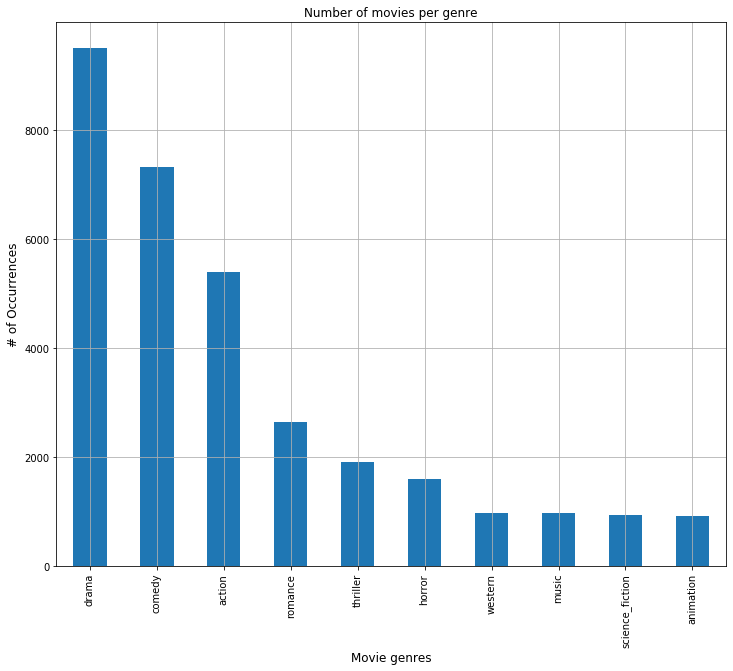

In [9]:
## Show 10 main categories
mainGenres = genres.loc[:9,:]
mainGenres.plot(x='Genre', y='Count', kind='bar', legend=False, grid=True, figsize=(12, 10))
plt.title("Number of movies per genre")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Movie genres', fontsize=12)
plt.show()

For each movie, keep only the categories that are in our "top10" genre.

Keep only the movies that have at least one genre.

In [10]:
## Keep only categories that are in our top10
movies['MainGenre'] = movies['GenreListed'].apply(lambda x: x[np.in1d(x,mainGenres)])
## Keep only films with categories
selectedMovies = movies[movies['MainGenre'].apply(len)>0]
print(f"All movies:                     {movies.shape[0]}\nMovies with at least one genre: {selectedMovies.shape[0]}")

C:\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


All movies:                     34886
Movies with at least one genre: 26325


# Output layer creation

In [11]:
# Creat the output layer with all categories
categoriesVector = selectedMovies.MainGenre.apply(lambda x: '-'.join(x)).str.get_dummies(sep='-')
selectedMovies = pd.concat([selectedMovies, categoriesVector], axis=1)

categoriesVector

,action,animation,comedy,drama,horror,music,romance,science_fiction,thriller,western
6,0,0,0,0,0,0,0,0,0,1
7,0,0,1,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0,0,1
14,0,0,1,0,0,0,0,0,0,0
15,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
34877,0,0,0,1,0,0,0,0,0,0
34882,0,0,1,0,0,0,0,0,0,0
34883,0,0,1,0,0,0,0,0,0,0
34884,0,0,1,0,0,0,1,0,0,0


# Features preparation
Term Frequency-Inverse Document Frequency (TF-iDF)

## Splitting The Data into Training and Test Sets
A proportion of 80% 20% is taken

In [12]:
rawPlot_train, rawPlot_test, cat_train, cat_test = train_test_split(selectedMovies.Plot, categoriesVector, random_state=62, train_size=0.8, shuffle=True) #80% 20%

In [13]:
catVector_train = pd.DataFrame(cat_train, columns=mainGenres.Genre)
catVector_test = pd.DataFrame(cat_test, columns=mainGenres.Genre)

## Learning training set vocabulary and words frequency

The vocabulary is limited to 10'000 words to reduse the computing time. 10'000 is selected, based on this graph.
<img src="TopKvsAccuracy.png" alt="drawing" width="1000"/>

*This part take lot of time (22min), so the result is stored in a file for futur use*

In [18]:
plotVectorizer  = TfidfVectorizer(tokenizer = myTokenizer, min_df=3, max_features=10000)
plotVector_train = plotVectorizer.fit_transform(rawPlot_train)
with open("data/plotVectorizer.pickle", 'wb') as fd:
    pickle.dump(plotVectorizer, fd)
with open("data/plotVector_train.pickle", 'wb') as fd:
    pickle.dump(plotVector_train, fd)

In [19]:
%%time
# Learn vocabulary from training texts
# Save variable into pickle file so you don't have to re-calculate it
try:
    plotVectorizer
except:
    try:
        with open('data/plotVectorizer.pickle', 'rb') as fd:
            plotVectorizer = pickle.load(fd)
    except:
        plotVectorizer  = TfidfVectorizer(tokenizer = myTokenizer, min_df=3, max_features=10000)
        plotVectorizer.fit(rawPlot_train)
        with open("data/plotVectorizer.pickle", 'wb') as fd:
            pickle.dump(plotVectorizer, fd)
            
        if IN_COLAB:
            files.download('data/plotVectorizer.pickle') 

Wall time: 0 ns


## Creating training set features
*This part take lot of time (21min), so the result is stored in a file for futur use*

In [20]:
%%time
# Vectorize the training texts

try:
    plotVector_train
except:
    try:
        with open('data/plotVector_train.pickle', 'rb') as fd:
            plotVector_train = pickle.load(fd)
    except:
        plotVector_train = plotVectorizer.transform(rawPlot_train)
        with open("data/plotVector_train.pickle", 'wb') as fd:
            pickle.dump(plotVector_train, fd)
            
        if IN_COLAB:
            files.download('data/plotVector_train.pickle') 

Wall time: 0 ns


## Creating test set features
*This part take lot of time (5min), so the result is stored in a file for futur use*

In [21]:
%%time
# Vectorize the validation texts.

try:
    plotVector_test
except:
    try:
        with open('data/plotVector_test.pickle', 'rb') as fd:
            plotVector_test = pickle.load(fd)
    except:
        plotVector_test = plotVectorizer.transform(rawPlot_test)
        with open("data/plotVector_test.pickle", 'wb') as fd:
            pickle.dump(plotVector_test, fd)
            
        if IN_COLAB:
            files.download('data/plotVector_test.pickle') 

Wall time: 5min 6s


# One VS All Classification

## Plot tokenization

In [22]:
print(f"Raw text:\n {rawPlot_train.iloc[0]}\n")
print(f"Tockens:\n  {plotVectorizer.inverse_transform(plotVector_train[0].toarray())}")

Raw text:
 Omar Sharif plays Muhassab, headman Gad's son who goes with Mayor Migahed (Rushdy Abaza) to buy an expensive scow in Luxor, but the thieves become aware of this purchase and decide to steal the money.

Tockens:
  [array(['aware', 'buy', 'decide', 'expensive', 'go', 'mayor', 'money',
       'omar', 'play', 'purchase', 'son', 'steal', 'thief'], dtype='<U16')]


## Training the classifiers

The principle of <span style="color:lightgreen">**One VS All**</span> is used, with a <span style="color:lightgreen">**multinomial Naive Bayes algorithm**</span> to make the classification

In [23]:
nbClassifiers=pd.DataFrame(columns=['Genre', 'Classifier', 'Accuracy'])
for i, genre in enumerate(mainGenres.Genre):
    multinomialNB=OneVsRestClassifier(MultinomialNB())
    multinomialNB.fit(plotVector_train, catVector_train[genre])
    prediction = multinomialNB.predict(plotVector_test)
    nbClassifiers.loc[i,'Genre'] = genre    
    nbClassifiers.loc[i,'Classifier'] = multinomialNB
    nbClassifiers.loc[i,'Accuracy'] = accuracy_score(catVector_test[genre], prediction)

## Classifier result on test set

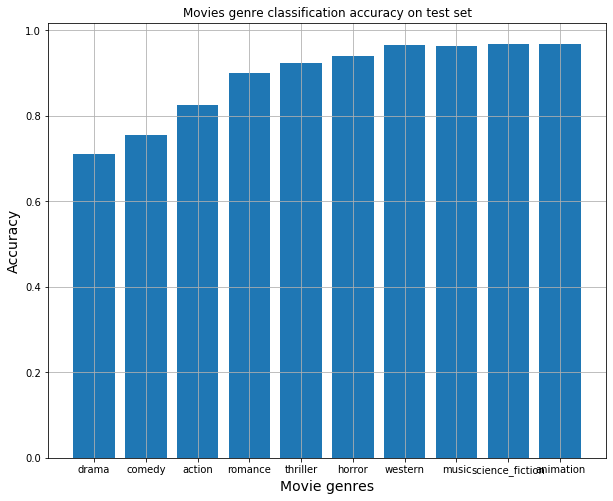

In [24]:
plt.figure(figsize=(10,8))
plt.bar(nbClassifiers.Genre, height=nbClassifiers.Accuracy)
plt.grid()
plt.title("Movies genre classification accuracy on test set")
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Movie genres', fontsize=14)
plt.show()

## Final genre detection function and use

In [35]:
def genreClassifier(text, vectorizer, classifier):
    predictions = pd.DataFrame(columns=['Genre', 'Probality', 'Prediction'])
    textVector = vectorizer.transform([text])
    for i,genre in enumerate(classifier.Genre):
        predictions.loc[i,'Genre'] = genre
        predictions.loc[i,'Probality'] =  classifier.loc[i,'Classifier'].predict_proba(textVector)[0,1]
        predictions.loc[i,'Prediction'] =  (predictions.loc[i,'Probality']>0.2)*1
    return predictions

In [36]:
plot_fastAndFurious = "After defeating Owen Shaw and his crew and securing amnesty for their past crimes,[N 1] Dominic 'Dom' Toretto, Brian O'Conner, and the rest of their team have returned to the United States to live peaceful, normal lives again, thanks to DSS agent Luke Hobbs erasing their criminal records. Brian begins to accustom himself to life as a father, while Dom tries to help Letty Ortiz regain her memory. Meanwhile, Owen's older brother, Deckard Shaw, breaks into the secure hospital in London, England that the comatose Owen is being held in and swears vengeance against Dom and his team, before breaking into Luke Hobbs' DSS HQ office in Los Angeles to extract profiles of Dom's crew. After revealing his identity, Shaw engages Hobbs in a fight and escapes when he detonates a bomb that severely injures Hobbs. Dom later learns from his sister Mia that she is pregnant again and convinces her to tell Brian. However, a letter bomb sent from Tokyo, explodes and destroys the Toretto house just seconds after Han, a member of Dom's team, is apparently killed by Shaw in Tokyo.[N 2] Dom visits Hobbs in a hospital, where he learns that Shaw is a rogue special forces assassin seeking to avenge his brother. Dom travels to Tokyo to reclaim Han's corpse and acquires personal items found at Han's crash site from Han's friend, Sean Boswell.As Dom, Brian, Tej, and Roman mourn Han and Gisele’s deaths at Han's funeral in Los Angeles, Dom notices a car eerily observing them, and after a lengthy car chase through the city streets, confronts its driver in an underground tunnel, who is revealed to be Shaw. Shaw flees when a covert ops team arrives and opens fire, led by Mr. Nobody. At his air base of operations in San Diego, Nobody says that he will assist Dom in stopping Shaw if he helps him obtain God's Eye, a computer program that uses digital devices to track down a person, and save its creator, a hacker named Ramsey, from an African mercenary terrorist named Mose Jakande. Dom, Brian, Letty, Roman Pearce, and Tej Parker then airdrop their cars over the Caucasus Mountains in Azerbaijan, ambush Jakande's convoy, and rescue Ramsey. The team then jets off to Abu Dhabi in a military plane, where a billionaire has acquired the flash drive containing God's Eye and manages to steal it from the owner after the team secretly infiltrates a gala at Etihad Towers dressed in formalwear. With God's Eye near telecommunications repeaters, the team tracks down Shaw, who is waiting at a remote factory. Dom, Brian, Nobody, and his team attempt to capture Shaw, but are ambushed by Jakande and his men and are forced to flee while Jakande obtains God's Eye. At his own request, the injured Nobody is left behind to be airlifted by helicopter while Brian and Dom continue on without him. To reduce their disadvantage, the crew returns home to Los Angeles to fight Shaw, Jakande, and his henchmen. Dom plans to singlehandedly fight Shaw alone, while Letty, Brian, Tej and Roman plan to protect Ramsey from the wrath of Jakande. Meanwhile, Brian phones Mia, warning her about the upcoming final showdown, warning her that he may not come back alive but Mia gives him the courage to prevail after revealing her pregnancy. Brian promises Mia that he will retire from his criminal lifestyle and fully dedicate himself to their family after he defeats Shaw and Jakande. Deckard, Dom and Brian then gear up for the ultimate final showdown, fully under arms and armed to the teeth.As Jakande pursues Brian and the rest of the team with a stealth helicopter and an aerial drone, Ramsey attempts to hack into God's Eye. Hobbs, seeing the team in trouble after Jakande takes out a cell tower, break sout of the hospital and destroys the drone with an ambulance. Brian engages Jakande's henchman Kiet and defeats him by tying a weight to him and shoves him down an elevator shaft before hijacking a signal repeater tower, allowing Ramsey to regain control of God's Eye and shut it down. Dom and Shaw engage in a one-on-one brawl on top of a public parking garage, before Jakande intervenes and attacks them both. Shaw is defeated when part of the parking garage collapses beneath him. Dom then launches his 1970 Dodge Charger at Jakande's helicopter, hooking Shaw's bag of grenades onto its skids, though his car crash-lands in a mountain of rubble. Hobbs then shoots the bag of grenades from ground level, destroying the helicopter and killing Jakande. Dom is pulled from the wreckage of his car, believed to be dead. As Letty cradles Dom's body in her arms, she reveals that she has fully regained all her memories back, and that she remembers everything about her pre-amnesiac life, especially their wedding in the Dominican Republic. Dom regains consciousness soon after, remarking, 'It's about time'.Shaw is taken into custody by Hobbs and locked away in a secret, high-security prison. The rest of the team relaxes on a tropical beach in the Dominican Republic, enjoying the sun. Brian and Mia play in the sand with their son Jack by the water while Dom, Letty, Roman, Tej, and Ramsey observe, acknowledging that Brian is better off happily retired with his family and realizing that Brian’s place is now raising a family instead of on the road with them. Overcome with emotion, Dom stands up to silently leave. Ramsey asks if he intends to say goodbye. Dom says, 'It's never goodbye.' Alone and downcast, Dom drives along the Southern California countryside. As Dom pulls up to a four-way stop, Brian catches up with him and pull up in a car beside Dom, teasing him for leaving without a goodbye. In their last moment together, the duo exchange pleasantries and race across the freeway as Dom continues to reminisce in voiceover.Dom remembers all the fun times that he had with Brian as memoriam montage flashbacks of Walker’s moments as Brian in previous Fast and Furious films appear on the screen. They bid each other farewell after approaching a fork in the road and part company, with Brian veering off as Dom continues on the road ahead, driving off in separate directions."
genreClassifier(plot_fastAndFurious, plotVectorizer, nbClassifiers)

,Genre,Probality,Prediction
0,drama,0.134918,0
1,comedy,0.118446,0
2,action,0.68654,1
3,romance,0.0122871,0
4,thriller,0.0860672,0
5,horror,0.0520379,0
6,western,0.00497117,0
7,music,0.0052341,0
8,science_fiction,0.0298217,0
9,animation,0.00723347,0


In [37]:
plot_saw = "Two men, Brad and Ryan, awaken in a Metropolitan Storefront, bound at the wrists to opposite sides of a worktable with a circular saw in front of each of them. Their mutual lover, Dina, is suspended above a third saw, and Jigsaw's puppet informs the men that Dina has been manipulating both of them, driving them into criminal activity to fulfill her material desires. They are given a choice — either Brad or Ryan can be killed, or let Dina die. They initially fight each other, during which Brad is cut by the saw. However, Ryan notices Dina is only cheering for whoever's winning, making him realize she's only using them, so he makes peace with Brad, and they allow Dina to die instead.After witnessing Mark Hoffman's survival and being attacked, Jill Tuck meets Matt Gibson, an internal affairs detective from the precinct where he works, and incriminates him in exchange for protection and immunity from prosecution. Gibson, who has distrusted Hoffman for years, agrees to her terms. Meanwhile, Hoffman abducts a skinhead gang — Dan, Evan, Jake, and Kara — and places them in a junkyard trap that kills them all, leaving the reverse bear trap at the scene to incriminate Jill, who is later put into protective custody. After a meeting of Jigsaw survivors, including Lawrence Gordon, who cauterized his leg on a steam pipe after escaping the bathroom, Hoffman abducts Bobby Dagen, a self-help guru who achieved fame and fortune by falsifying a story of his own survival. He sends Gibson some videos with cryptic clues to the game's location, offering to end the games if Jill is given to him.Meanwhile, Bobby awakens in a cage in an abandoned asylum and is told that his wife Joyce will die if he doesn't save her within one hour. Joyce is chained at the neck to a steel platform that gradually pulls her down as she watches Bobby's progress. After he escapes the cage, which dangles over a floor of spikes, he begins searching for Joyce. Along the way, he finds Nina, his publicist; Suzanne, his lawyer; and Cale, his best friend and co-conspirator, in separate traps representing the three wise monkeys and all of them are killed despite his efforts to save them. After removing his upper wisdom teeth to obtain the combination for a security door, Bobby finds Joyce and is forced to reenact the trap he claimed to have survived: he must drive two hooks through his pectoral muscles and hoist himself up to the ceiling to deactivate her trap. He fails nonetheless, and is forced to watch as a brazen bull capsule closes around Joyce and incinerates her to death.Gibson eventually discovers the game's location and sends a SWAT team, who are sealed in another room and killed by toxic gas. Simultaneously, he and two officers infiltrate Hoffman's command center in the junkyard, where they find Dan's corpse sitting in front of several monitors connected to the police headquarter's security cameras. He sees Hoffman brought into the morgue in a body bag and tries to warn Palmer, but an automatic turret gun rises up and kills him along with his men. Hoffman kills Dr. Heffner, Palmer, and everyone else in his path to Jill, who briefly escapes before she is caught and knocked unconscious. He straps her to a chair and locks a reverse bear trap to her head; she awakens as the timer starts and is killed when the trap activates, tearing her jaws apart.After destroying his workshop, Hoffman is attacked and subdued by three pig-masked figures, one of whom is Lawrence Gordon. Flashbacks show that John Kramer found him unconscious by the steam pipe and nursed him back to health, and Gordon has assisted him ever since. This was known only by Jill, who delivered a package to him at the hospital, which contained a videotape, in which John asked him to watch over Jill and take action if anything happened to her. As a result, Gordon has Hoffman brought to the bathroom from the first film and shackled by the ankle to a pipe. When Hoffman tries to reach for the hacksaw used to sever Gordon's leg, in an effort to escape, Gordon throws it out of the room, turns off the lights and yells 'Game Over', before sealing the door, leaving Hoffman to die."
genreClassifier(plot_saw, plotVectorizer, nbClassifiers)

,Genre,Probality,Prediction
0,drama,0.0958414,0
1,comedy,0.128593,0
2,action,0.287347,1
3,romance,0.00659342,0
4,thriller,0.106934,0
5,horror,0.275794,1
6,western,0.00553931,0
7,music,0.00400301,0
8,science_fiction,0.0386528,0
9,animation,0.0101479,0


In [38]:
plot_EternalSunshineOfTheSpotlessMind = "Shy, soft-spoken Joel Barish and unrestrained free spirit Clementine Kruczynski meet on a Long Island Rail Road train from Montauk to Rockville Centre. Both had felt the need to travel to Montauk that day, and they almost immediately connect, feeling drawn to each other despite their contrasting personalities. Although Joel and Clementine do not realize it, they were once in a relationship, having separated after dating for two years. After a fight, Clementine had hired the New York City firm Lacuna, Inc. to erase all her memories of their relationship. Upon discovering this from his friends Rob and Carrie, Joel decides to undergo the procedure himself.The narrative subsequently takes place in Joel's mind during the memory erasing procedure. Joel finds himself revisiting his memories of Clementine in reverse, starting from the downfall of their relationship. As he comes across happier memories of Clementine early in their relationship, he attempts to preserve at least some memory of her and his love for her, trying to evade the procedure by taking his idealized memory of Clementine into memories not linked to her and attempting to wake up and stop the process. Despite his efforts, the technicians succeed in erasing his memories. Joel comes to the last remaining memory of Clementine, the day he first met her at a beach house in Montauk. As the memory disintegrates around them, she whispers to meet her in Montauk. This leads to both Joel and Clementine travelling to Montauk, where they subsequently meet on the train.A separate story arc occurs during Joel's memory erasure, revolving around Lacuna's employees. Patrick, one of the Lacuna technicians performing the erasure, uses Joel's memories and his mementos of Clementine to seduce and date her in the present. Mary, the Lacuna receptionist, is dating another technician, Stan, but has feelings for the married head of Lacuna, Dr. Howard Mierzwiak. During Joel's memory wipe, Mary discovers she previously had an affair with Dr. Mierzwiak and agreed to have the affair erased from her memory after Dr. Mierzwiak's wife found out. Devastated by this discovery, Mary quits her job and steals the company's records, mailing all of Lacuna's clients the tapes of each client recounting their memories to be erased.In the present, Joel and Clementine meet at the Montauk train station and are eager to begin what appears to be a new and exciting relationship. When they both receive their Lacuna records mailed by Mary, they are shocked and disturbed by the bitter memories they have of each other. Clementine attempts to leave, saying that the relationship might end the same way it did in the tapes. They realize that flaws in their relationship are inevitable but decide to go on with it, believing that they are meant to be together."
genreClassifier(plot_EternalSunshineOfTheSpotlessMind, plotVectorizer, nbClassifiers)

,Genre,Probality,Prediction
0,drama,0.359551,1
1,comedy,0.254069,1
2,action,0.0365448,0
3,romance,0.0753299,0
4,thriller,0.0278451,0
5,horror,0.0208871,0
6,western,0.00179911,0
7,music,0.00344141,0
8,science_fiction,0.00644977,0
9,animation,0.00221993,0
